<a href="https://colab.research.google.com/github/001ckk/Unsupervised-Learning-with-R/blob/main/Anomaly_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Analysis Objectives**

Perform anomaly detection analysis on sales data and report any inconsistencies.

**Understanding context**

Carrefour Kenya seeks to undertake a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Anomaly detection analysis on sales data would be helpful in identifying if there is occurrence of any fraudulent transactions and when they occured to perform further investigation.

**Experimental Design**

*   Problem definition
*   Data Loading
*   Exploratory data analysis
*   Implementation of the solution
*   Summary of findings








In [ ]:
# Extending to R
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
# Loading the data and checking the first 6 rows 
%%R
sales_forcast = read.csv('Supermarket_Sales_Forecasting - Sales.csv',stringsAsFactors = FALSE, header = TRUE)
head(sales_forcast)

       Date    Sales
1  1/5/2019 548.9715
2  3/8/2019  80.2200
3  3/3/2019 340.5255
4 1/27/2019 489.0480
5  2/8/2019 634.3785
6 3/25/2019 627.6165


In [ ]:
# Loading the data and checking the last 6 rows 
%%R
tail(sales_forcast)

          Date     Sales
995  2/18/2019   63.9975
996  1/29/2019   42.3675
997   3/2/2019 1022.4900
998   2/9/2019   33.4320
999  2/22/2019   69.1110
1000 2/18/2019  649.2990


In [ ]:
%%R
# Changing column names to lower case for easy access. 
colnames(sales_forcast) = tolower(colnames(sales_forcast))


       date    sales
1  1/5/2019 548.9715
2  3/8/2019  80.2200
3  3/3/2019 340.5255
4 1/27/2019 489.0480
5  2/8/2019 634.3785
6 3/25/2019 627.6165


In [ ]:
%%R
# A mathematical summary of the sales column.
summary(sales_forcast$sales)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.68  124.42  253.85  322.97  471.35 1042.65 


In [ ]:
%%R
# Installing and loading packages 
install.packages('lubridate')
library(lubridate)
install.packages('tidyverse')
library(tidyverse)
install.packages('tibbletime')
library(tibbletime)
install.packages('anomalize')
library(anomalize)

In [ ]:
%%R
# Total and average sales made per day
sales <- sales_forcast %>% group_by(date) %>% summarise_all(list(sum = sum, average = mean))
head(sales)

# A tibble: 6 × 3
  date        sum average
  <chr>     <dbl>   <dbl>
1 1/1/2019  4745.    395.
2 1/10/2019 3561.    396.
3 1/11/2019 2115.    264.
4 1/12/2019 5185.    471.
5 1/13/2019 2451.    245.
6 1/14/2019 3967.    305.


In [ ]:
%%R
# Convert date column into date object
sales$date <- as_date(mdy(sales$date))
head(sales)

# A tibble: 6 × 3
  date         sum average
  <date>     <dbl>   <dbl>
1 2019-01-01 4745.    395.
2 2019-01-10 3561.    396.
3 2019-01-11 2115.    264.
4 2019-01-12 5185.    471.
5 2019-01-13 2451.    245.
6 2019-01-14 3967.    305.


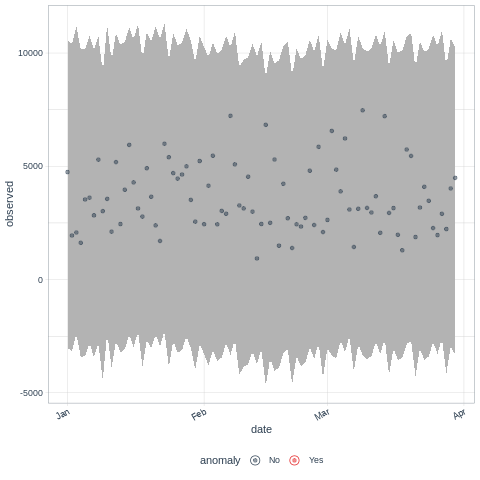

In [ ]:
%%R
# Anomaly detection using total sales per day
sales %>% as_tbl_time(date) %>% time_decompose(sum) %>% anomalize(remainder) %>% time_recompose()%>%plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5);
# There are no anomalies in the data.

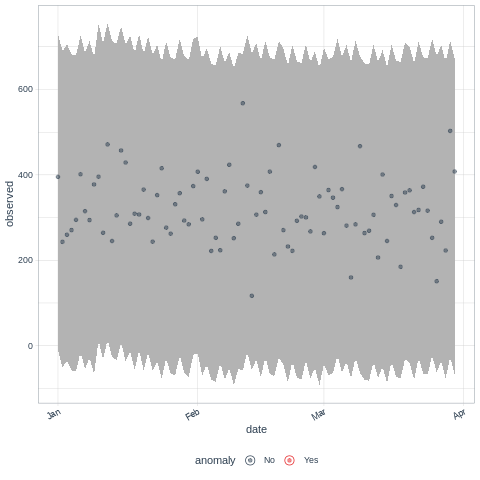

In [ ]:
%%R
# Anomaly detection using average sales per day
sales %>% as_tbl_time(date) %>% time_decompose(average) %>% anomalize(remainder) %>% time_recompose()%>%plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5);
# There are no anomalies in the data 